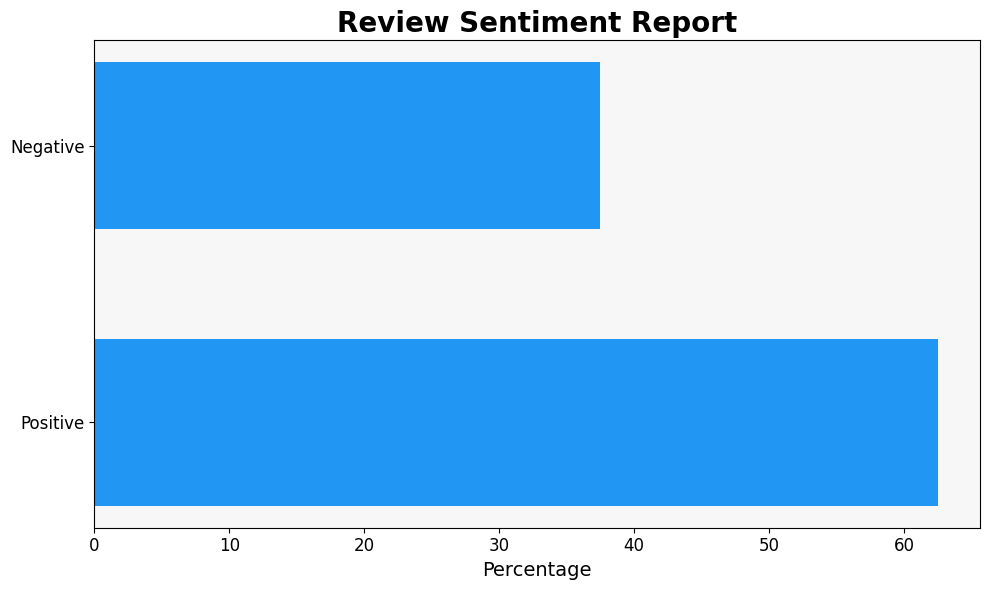

In [5]:
import numpy as np
import pickle
import streamlit as st
import re
import matplotlib.pyplot as plt
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Lemmatizer and tfidf object
wordnet_lem = WordNetLemmatizer()


#Loading the saved model
MNB = pickle.load(open('E:/STUDY/3_2/CSE 3200/Sentiment Analysis/NLTK/MNB.sav', 'rb'))
MNB_tfidf = pickle.load(open('E:/STUDY/3_2/CSE 3200/Sentiment Analysis/NLTK/MNB_tfidf.sav', 'rb'))

MNB2 = pickle.load(open('E:/STUDY/3_2/CSE 3200/Sentiment Analysis/NLTK/MNB2.sav', 'rb'))
MNB2_CV2grams = pickle.load(open('E:/STUDY/3_2/CSE 3200/Sentiment Analysis/NLTK/MNB2_CV2grams.sav', 'rb'))

#For cleaning the input string
def cleaning(text):
    text = text.lower()  # converting to lowercase


    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text) 



    # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("aren't",'are not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters
    text = text.translate(str.maketrans('','',string.punctuation)) #punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    return text


#Prediction using Multinomial naive bayes
def sentiment_analysis_MNB(df):

    dt = df['review'].apply(cleaning)
    dt = pd.DataFrame(dt)
    dt['review'] = df['review']

    dt['review'] = dt['review'].apply(wordnet_lem.lemmatize)

    text_counts = MNB_tfidf.transform(dt['review'])

    dt['sentiment'] = MNB.predict(text_counts)

    dt.sentiment = ["Negative" if each == 0 else "Positive" for each in dt.sentiment]


    return dt
    

def scrapeComments(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.find_all('div', {'class': 'text show-more__control'})
    review_texts = []
    for review in reviews:
        review_text = review.text.strip()
        review_texts.append(review_text)
    
    df = pd.DataFrame({'review': review_texts})
    return df


def show_graph(df):
    column = 'sentiment' # Replace 'Category' with the name of the column you want to use

    freq = df[column].value_counts()

    # Calculate the percentages
    total = freq.sum()
    percentages = [(count/total)*100 for count in freq.values]

    # Create a bar graph
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(freq.index, percentages, height=0.6, color='#2196F3', capstyle='round', joinstyle='round')

    # Customize the graph
    ax.set_title('Review Sentiment Report', fontsize=20, fontweight='bold')
    ax.set_xlabel('Percentage', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_facecolor('#f7f7f7')
    fig.tight_layout()

    # Display the graph
    plt.show()

    
    

url = input()
    

df = scrapeComments(url)

new_df = sentiment_analysis_MNB(df)

show_graph(new_df)     




